## Environment setup

In [1]:
import glob
import importlib

## Networks definitions and adaptations

In [2]:
from architecture_definitions import *

oneOverPt = False 
lut_nn = True
output_type = 0
last_input_is_bias = True

if output_type == 1:
    layer3_neurons = 3
    loss_fn = custom_loss3
else: 
    output_cnt = 1
    layer3_neurons = 1
    loss_fn = 'mae'
        
if not last_input_is_bias:
    networkInputSize =  nLayers
    layer2_lutRangesCnt = 1
    layer2_input_offset = None 

print_Classic_NN()  
print_LUT_NN()  

Classic NN definitions:
dense_layer1_size: 128
dense_layer2_size: 64
dense_layer3_size: 48
dense_layer4_size: 1
------------------------
LUT NN definitions:
layer1_lut_size 1024
layer2_lut_size 256
layer3_lut_size 32
layer2_lutRangesCnt 16
layer2_input_offset 8.0
------------------------


### Classic NN data read test

In [5]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/"   
testDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/" 

testFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_newerSample_files_1_100_chunk_0.tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'OMTFHits_pats0x0003_oldSample_files_*_chunk_0.tfrecord.gzip')

trainDataDir = "/scratch_cmsse/alibordi/data/"
testDataDir = "/scratch_cmsse/alibordi/data/"
testFileNames = glob.glob(trainDataDir+'*15Feb*tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'*22Feb*.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, trainFileNames, isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, testFileNames, isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

Reading data from files:
/scratch_cmsse/alibordi/data/omtfAnalysis_22Feb.tfrecord.gzip
Execution time: 4.190115006000269
features.shape: (4096, 37)
len(labels) 1
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF Layers:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
  0.]
ptLabels:
 20.62
weights:
 1.0
Reading data from files:
/scratch_cmsse/alibordi/data/omtfAnalysis_15Feb.tfrecord.gzip
Execution time: 3.0157685580052203
features.shape: (4096, 37)
len(labels) 6
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF Layers:
 [ 0.  0.  0. -6. -2. -7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 16. 16.  0.  0.  0.  0. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
  2.]
ptLabels:
 48.75
weights:
 1.0
CPU times: user 24 s, sys: 5.72 s, total: 29.7 s
Wall time: 7.64 s


### LUT NN data read test

In [ ]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/"   
testDataDir = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/" 

testFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_newerSample_files_1_100_chunk_0.tfrecord.gzip')
trainFileNames = glob.glob(trainDataDir+'OMTFHits_pats0x0003_oldSample_files_*_chunk_0.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, trainFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, testFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

In [7]:
import pandas as pd
import numpy as np
fileName = "/scratch_cmsse/alibordi/data/df.parquet_omtfAnalysis_22Feb.gzip"
#fileName = "/scratch_ssd/akalinow/ProgrammingProjects/MachineLearning/OMTF/data/18_12_2020/df.parquet_OMTFHits_pats0x0003_newerSample_files_1_100_chunk_0.gzip"
df = pd.read_parquet(fileName)
print(df.columns)
df.describe()

Index(['eventNum', 'muonEvent', 'muonPt', 'muonEta', 'muonPhi', 'muonCharge',
       'muonDxy', 'muonRho', 'omtfPt', 'omtfEta', 'omtfPhi', 'omtfCharge',
       'omtfHwEta', 'omtfProcessor', 'omtfScore', 'omtfQuality',
       'omtfRefLayer', 'omtfRefHitNum', 'omtfFiredLayers', 'killed', 'hits',
       'phiDist_0', 'phiDist_1', 'phiDist_2', 'phiDist_3', 'phiDist_4',
       'phiDist_5', 'phiDist_6', 'phiDist_7', 'phiDist_8', 'phiDist_9',
       'phiDist_10', 'phiDist_11', 'phiDist_12', 'phiDist_13', 'phiDist_14',
       'phiDist_15', 'phiDist_16', 'phiDist_17'],
      dtype='object')


,eventNum,muonEvent,muonPt,muonEta,muonPhi,muonCharge,muonDxy,muonRho,omtfPt,omtfEta,...,phiDist_8,phiDist_9,phiDist_10,phiDist_11,phiDist_12,phiDist_13,phiDist_14,phiDist_15,phiDist_16,phiDist_17
count,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.0,396761.0,396761.000000,396761.000000,...,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000,396761.000000
mean,500484.365570,-0.023578,27.846062,-0.001460,0.001446,0.001038,0.0,0.0,30.496510,-0.000028,...,7288.071955,8727.332414,5320.767442,5872.974239,5980.751115,7441.291415,8114.038212,6890.633152,6574.906677,7978.973836
std,288487.903954,0.151732,25.793932,0.987830,1.793506,0.988141,0.0,0.0,36.729122,0.979853,...,4444.881396,3331.368566,4988.967969,4922.773810,4902.231229,4362.717969,3910.864656,4628.188450,4744.739898,4014.629978
min,3.000000,-1.000000,0.000000,-1.309737,-3.141589,-1.000000,0.0,0.0,0.000000,-1.250625,...,-220.000000,-220.000000,-289.000000,-354.000000,-424.000000,-438.000000,-165.000000,-290.000000,-210.000000,-221.000000
25%,250822.000000,0.000000,7.412463,-0.976540,-1.530916,-1.000000,0.0,0.0,6.000000,-0.978750,...,14.000000,9999.000000,1.000000,1.000000,2.000000,44.000000,9999.000000,12.000000,6.000000,9999.000000
50%,500777.000000,0.000000,17.652393,0.000000,0.000000,0.000000,0.0,0.0,16.000000,0.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
75%,750249.000000,0.000000,41.927822,0.976009,1.536276,1.000000,0.0,0.0,40.000000,0.978750,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
max,999994.000000,0.000000,99.997650,1.313294,3.141584,1.000000,0.0,0.0,200.000000,1.250625,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


,eventNum,muonEvent,muonPt,muonEta,muonPhi,muonCharge,muonDxy,muonRho,omtfPt,omtfEta,...,phiDist_8,phiDist_9,phiDist_10,phiDist_11,phiDist_12,phiDist_13,phiDist_14,phiDist_15,phiDist_16,phiDist_17
0,10001,-1,0.0,0.0,0.0,0,0.0,0.0,4.0,1.076625,...,9999,9999,-5,-5,9999,9999,9999,9999,9999,9999
22,10140,-1,0.0,0.0,0.0,0,0.0,0.0,4.5,-1.196250,...,9999,11,0,9999,9999,9999,9999,9999,9999,9999
32,10173,-1,0.0,0.0,0.0,0,0.0,0.0,4.5,-1.250625,...,1,-13,9999,9999,9999,9999,9999,9999,9999,9999
36,10187,-1,0.0,0.0,0.0,0,0.0,0.0,4.5,0.793875,...,9999,9999,9999,9999,-8,9999,9999,9999,9999,9999
121,10620,-1,0.0,0.0,0.0,0,0.0,0.0,40.0,1.250625,...,1,-2,9999,9999,9999,9999,9999,9999,9999,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396618,599169,-1,0.0,0.0,0.0,0,0.0,0.0,114.0,1.250625,...,0,1,9999,9999,9999,9999,9999,9999,9999,0
396645,599333,-1,0.0,0.0,0.0,0,0.0,0.0,4.5,1.250625,...,9,4,9999,9999,9999,9999,9999,9999,9999,17
396679,599540,-1,0.0,0.0,0.0,0,0.0,0.0,4.0,1.076625,...,9999,9999,12,-8,9999,9999,9999,9999,9999,9999
396686,599598,-1,0.0,0.0,0.0,0,0.0,0.0,4.5,0.859125,...,9999,9999,9999,9999,8,9999,9999,9999,9999,9999


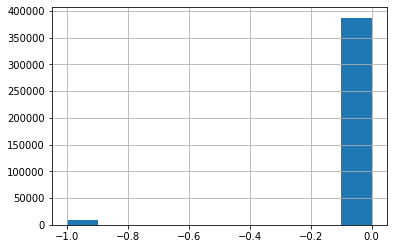

In [11]:
df1 = df[np.abs(df["muonEta"])<0.5]
df["muonEvent"].hist()
df1